# Classification Problem

In [37]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.impute import SimpleImputer

In [38]:
data = datasets.load_breast_cancer()

In [55]:
# Train and test values
x = data.data[:-2, :]
y = data.target[:-2]

# New Values to be predicted
x1 = data.data[-2: , :]
y1 = data.target[-2:]

#Adding outliers
x[-2:, 4:5] = 200
x[:2, 5:6] = 100

#Adding missing values
x[-2:, 5:6] = np.nan
x[2:4, 8:9] = np.nan

pd.DataFrame(data = x, columns=data.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,100.0000,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,100.0000,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.1599,0.19740,0.12790,NaN,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,NaN,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,15.22,30.62,103.40,716.9,0.10480,0.2087,0.25500,0.09429,0.2128,0.07152,...,17.52,42.79,128.70,915.0,0.1417,0.7917,1.1700,0.2356,0.4089,0.14090
563,20.92,25.09,143.00,1347.0,0.10990,0.2236,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.1159,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,200.00000,NaN,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


In [40]:
#Target Names
data.target_names

array(['malignant', 'benign'], dtype='<U9')

### Handling missing values

In [41]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x = imputer.fit_transform(x)

#### Data after handling missing values

In [42]:
pd.DataFrame(data = x, columns=data.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,100.0000,0.30010,0.14710,0.241900,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,100.0000,0.08690,0.07017,0.181200,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.1599,0.19740,0.12790,0.180913,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.180913,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.19800,0.10430,0.180900,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,15.22,30.62,103.40,716.9,0.10480,0.2087,0.25500,0.09429,0.212800,0.07152,...,17.52,42.79,128.70,915.0,0.1417,0.7917,1.1700,0.2356,0.4089,0.14090
563,20.92,25.09,143.00,1347.0,0.10990,0.2236,0.31740,0.14740,0.214900,0.06879,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.1159,0.24390,0.13890,0.172600,0.05623,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,200.00000,0.4575,0.14400,0.09791,0.175200,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


### Splitting the dataset to train and test

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Feature Scaling

In [44]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Data after Feature Scaling

In [45]:
pd.DataFrame(data = x_train, columns=data.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.183081,-0.611821,0.249108,0.054051,-0.065086,-0.057627,1.020834,1.038415,1.281901,0.710382,...,0.512945,0.297218,0.580318,0.368832,2.458006,1.298366,1.021242,1.333655,1.086414,1.335277
1,-0.683452,-0.061627,-0.711526,-0.665313,-0.067161,-0.072107,-0.791098,-0.917028,-0.996578,-0.297494,...,-0.643169,-0.105399,-0.685222,-0.607060,-0.170692,-0.434696,-0.626593,-0.714323,-0.573783,-0.208193
2,1.075352,-2.136369,1.252520,0.954315,-0.064920,15.016114,2.690036,2.541224,2.238570,2.273937,...,1.891469,-1.401217,2.317867,2.012215,1.332677,2.748805,2.252148,2.295010,2.692852,2.055601
3,0.583459,0.367380,0.592162,0.424897,-0.065034,-0.062610,0.750909,0.925452,0.518757,0.014366,...,0.611561,0.806411,0.661907,0.415074,1.192011,0.276526,0.457013,0.652887,0.324305,-0.087945
4,0.443327,-0.316122,0.455107,0.332468,-0.066527,-0.063018,0.136449,0.436721,0.131708,-0.262055,...,0.850757,0.281993,0.864369,0.731657,0.339223,2.050915,0.644579,1.000937,1.413710,1.236522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,-1.527677,-1.103846,-1.405940,-1.185403,-0.066472,-0.059409,-0.035182,-0.532951,0.350792,3.845997,...,-1.391600,-1.682034,-1.369968,-1.072863,-0.491586,-0.064087,-0.645451,-1.040448,-1.018083,1.445649
449,-0.740648,-0.209476,-0.725646,-0.709125,-0.065237,-0.067170,-0.230750,-0.373762,-0.018000,0.358830,...,-0.676740,0.616944,-0.676459,-0.650813,1.622801,0.085223,0.087996,0.093246,-0.145294,0.433128
450,0.017210,-0.575465,-0.097268,-0.086996,-0.069003,-0.078486,-1.038613,-1.116467,-1.087863,-1.262844,...,-0.305357,-0.839583,-0.406610,-0.361086,-2.031440,-1.352152,-1.179303,-1.263231,-0.695531,-1.296231
451,-0.071445,0.103189,-0.063212,-0.180555,-0.065856,-0.065418,0.302733,0.399585,-0.499986,0.392851,...,0.141562,0.877461,0.181437,-0.032588,1.293115,0.690461,0.697587,1.027003,0.444471,1.277186


### Dimensionanlity Reduction

In [46]:
pca = PCA()
pca = PCA(n_components=2)  
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

## Train Data after Feature scaling and Dimensionality reduction

In [47]:
pd.DataFrame( data = x_train, columns=["PCA1", "PCA2"])

,PCA1,PCA2
0,2.634251,1.421314
1,-2.906716,-0.501753
2,8.964343,2.131208
3,1.986186,-0.492741
4,2.601006,0.320324
...,...,...
448,-0.965959,7.609031
449,-1.080183,1.539777
450,-3.889932,-3.046983
451,0.491304,0.308113


## Initiating the KNN Classifier

In [48]:
classifier = KNeighborsClassifier(n_neighbors=9)

In [49]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

### Calculating the accuracy of the model

In [50]:
predictionData = classifier.predict(x_test)
cm = confusion_matrix(y_test, predictionData)
accuracyScore = accuracy_score(y_test, predictionData)
print(f"Model Accuracy:  {int(accuracyScore * 100)}%")

Model Accuracy:  96%


### Confusion Matrix

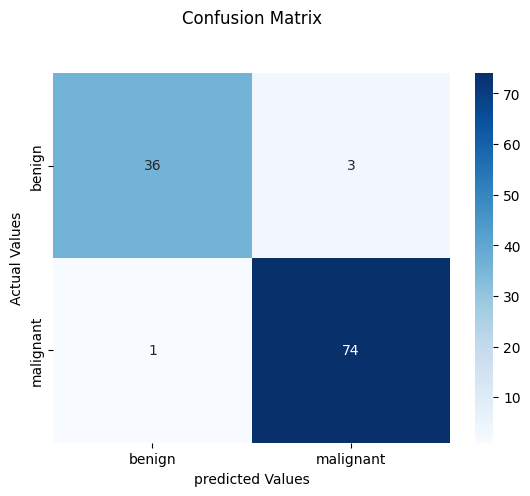

In [51]:
ax = sb.heatmap(cm, annot=True, cmap="Blues")
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel("predicted Values")
ax.set_ylabel("Actual Values")

ax.xaxis.set_ticklabels(['benign', 'malignant'])
ax.yaxis.set_ticklabels(['benign', 'malignant'])

plt.show()

## Visulizaing Actual values vs Predicted Values

C:\Users\amrga\AppData\Local\Temp\ipykernel_21856\1505659562.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


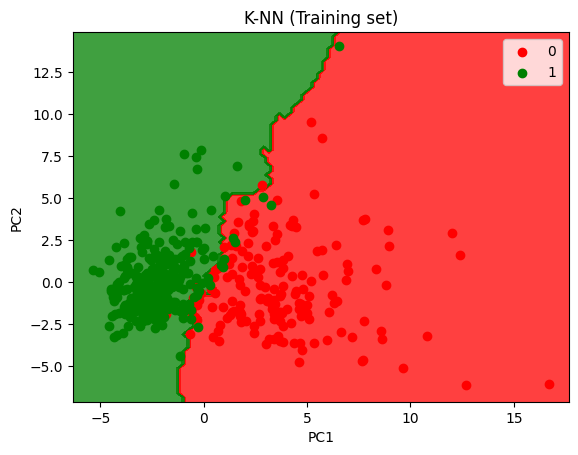

In [52]:
X_set, y_set = x_train, y_train

# Creating a meshgrid
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.25))

# Plotting decision boundaries
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Setting plot limits
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=str(j))



# Adding labels and legend
plt.title('K-NN (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

- 0 > malignant
- 1 > benign

### Predicting New values

In [53]:
pd.DataFrame(data = x1)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.152,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.265,0.4087,0.12400
1,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.000,0.2871,0.07039


In [54]:
x1 = pca.transform(sc.transform(x1))
print(f"Predicted Values: {classifier.predict(x1)}\n Actual Values: {y1}")

Predicted Values: [0 1]
 Actual Values: [0 1]
